In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

beat = "/content/drive/Shareddrives/DAT 490 Capstone/DAT 490 Capstone/location demographic shapefiles/beat_map.geojson"
precinct = "/content/drive/Shareddrives/DAT 490 Capstone/DAT 490 Capstone/location demographic shapefiles/precinct_map.geojson"
beat_precinct_list = "/content/drive/Shareddrives/DAT 490 Capstone/DAT 490 Capstone/location demographic shapefiles/precinct_beat_list.csv"

beat_gdf = gpd.read_file(beat)
precinct_gdf = gpd.read_file(precinct)
list_df = pd.read_csv(beat_precinct_list)

In [2]:
list_df = list_df.drop(list_df.columns[[0]], axis=1)

In [3]:
beat_gdf = beat_gdf.merge(list_df, on='BEAT', how='left')

In [4]:
precinct_names = ['P-' + col for col in precinct_gdf.columns]
precinct_gdf.columns = precinct_names

In [5]:
beat_names = ['B-' + col for col in beat_gdf.columns]
beat_gdf.columns = beat_names

In [6]:
uof = "/content/drive/Shareddrives/DAT 490 Capstone/DAT 490 Capstone/EDA/CPhoenix UOF Data/relabeled/cleaned_2-uof-incident-details.csv"
uof_df = pd.read_csv(uof, header=0)

uof_df = uof_df[~uof_df['Police Beat'].isin({'Maricopa', 'Out of City Beat'})]
uof_df['Police Beat'] = uof_df['Police Beat'].str[:3]
uof_df['Police Beat'] = uof_df['Police Beat'].astype(int)

In [7]:
maryvale = ['Maryvale/Estrella Precinct', 'Maryvale/Estrella Mountain Precinct Precinct']
mountain_view = ['Mountain View Precinct', 'Mountain View Precinct Precinct']
cactus_park = ['Cactus Park Precinct', 'Cactus Park Precinct Precinct']
desert_horizon = ['Desert Horizon Precinct', 'Desert Horizon Precinct Precinct']
south_mountain = ['South Mountain Precinct', 'South Mountain Precinct Precinct']
central = ['Central City Precinct Precinct', 'Central City Precinct']
black_mountain = ['Black Mountain Precinct', 'Black Mountain Precinct Precinct']

uof_df['is Maryvale/Estrella Precinct'] = uof_df['Police Precinct'].isin(maryvale).astype(int)
uof_df['is Mountain View Precinct'] = uof_df['Police Precinct'].isin(mountain_view).astype(int)
uof_df['is Cactus Park Precinct'] = uof_df['Police Precinct'].isin(cactus_park).astype(int)
uof_df['is Desert Horizon Precinct'] = uof_df['Police Precinct'].isin(desert_horizon).astype(int)
uof_df['is South Mountain Precinct'] = uof_df['Police Precinct'].isin(south_mountain).astype(int)
uof_df['is Central City Precinct'] = uof_df['Police Precinct'].isin(central).astype(int)
uof_df['is Black Mountain Precinct'] = uof_df['Police Precinct'].isin(black_mountain).astype(int)

def precinct(name):
    if name in maryvale:
        return 'Maryvale/Estrella Precinct'
    elif name in mountain_view:
        return 'Mountain View Precinct'
    elif name in cactus_park:
        return 'Cactus Park Precinct'
    elif name in desert_horizon:
        return 'Desert Horizon Precinct'
    elif name in south_mountain:
        return 'South Mountain Precinct'
    elif name in central:
        return 'Central City Precinct'
    elif name in black_mountain:
        return 'Black Mountain Precinct'

uof_df['Precinct2'] = uof_df['Police Precinct'].apply(precinct)

In [8]:
severe_force_binaries = uof_df.iloc[:, 30:38].sum(axis=1)
uof_df['Severe Force Used'] = (severe_force_binaries >= 1).astype(int)

In [9]:
very_severe_force_binaries = uof_df.iloc[:, 30:34].sum(axis=1)
uof_df['Very Severe Force Used'] = (very_severe_force_binaries >= 1).astype(int)

In [10]:
lots_o_data = uof_df.merge(beat_gdf, left_on = 'Police Beat', right_on='B-BEAT', how='left')

In [11]:
lots_o_data = lots_o_data.merge(precinct_gdf, left_on = 'Precinct2', right_on='P-NAME', how='left')

In [12]:
lots_o_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8638 entries, 0 to 8637
Columns: 115 entries, Incident Report Number to P-geometry
dtypes: float64(35), geometry(2), int64(62), object(16)
memory usage: 7.6+ MB


In [13]:
necessary = [4,5,6,7,10,11,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,40,41,42,43,44,45,46,54,57,59,65,76,79,87,90,92,98,109,112,48,49]

reduced = lots_o_data.iloc[:, necessary]

In [14]:
from sklearn.preprocessing import OneHotEncoder

day_encoder = OneHotEncoder()
day_1hot = day_encoder.fit_transform(reduced[['Day of Week']])

day_1hot = day_encoder.transform(reduced[['Day of Week']]).toarray()
outs = pd.DataFrame(day_1hot, columns = day_encoder.get_feature_names_out(), index = reduced.index)

In [15]:
reduced = reduced.merge(outs, left_index=True, right_index=True)

In [16]:
igender_encoder = OneHotEncoder()
igender_1hot = igender_encoder.fit_transform(reduced[['Individual Gender']])

igender_1hot = igender_encoder.transform(reduced[['Individual Gender']]).toarray()
outs = pd.DataFrame(igender_1hot, columns = igender_encoder.get_feature_names_out(), index = reduced.index)

In [17]:
reduced = reduced.merge(outs, left_index=True, right_index=True)

In [18]:
pgender_encoder = OneHotEncoder()
pgender_1hot = pgender_encoder.fit_transform(reduced[['Police Employee Gender / Sex']])

pgender_1hot = pgender_encoder.transform(reduced[['Police Employee Gender / Sex']]).toarray()
outs = pd.DataFrame(pgender_1hot, columns = pgender_encoder.get_feature_names_out(), index = reduced.index)

In [19]:
reduced = reduced.merge(outs, left_index=True, right_index=True)

In [20]:
irace_encoder = OneHotEncoder()
irace_1hot = irace_encoder.fit_transform(reduced[['Individual Race / Ethnicity Grouping']])

irace_1hot = irace_encoder.transform(reduced[['Individual Race / Ethnicity Grouping']]).toarray()
outs = pd.DataFrame(irace_1hot, columns = irace_encoder.get_feature_names_out(), index = reduced.index)

In [21]:
reduced = reduced.merge(outs, left_index=True, right_index=True)

In [22]:
prace_encoder = OneHotEncoder()
prace_1hot = prace_encoder.fit_transform(reduced[['Police Employee Race / Ethnicity Grouping']])

prace_1hot = prace_encoder.transform(reduced[['Police Employee Race / Ethnicity Grouping']]).toarray()
outs = pd.DataFrame(prace_1hot, columns = prace_encoder.get_feature_names_out(), index = reduced.index)

In [23]:
reduced = reduced.merge(outs, left_index=True, right_index=True)

In [24]:
year_encoder = OneHotEncoder()
year_1hot = year_encoder.fit_transform(reduced[['Year']])

year_1hot = year_encoder.transform(reduced[['Year']]).toarray()
outs = pd.DataFrame(year_1hot, columns = year_encoder.get_feature_names_out(), index = reduced.index)

In [25]:
reduced = reduced.merge(outs, left_index=True, right_index=True)

In [26]:
beat_encoder = OneHotEncoder()
beat_1hot = beat_encoder.fit_transform(reduced[['Police Beat']])

beat_1hot = beat_encoder.transform(reduced[['Police Beat']]).toarray()
outs = pd.DataFrame(beat_1hot, columns = beat_encoder.get_feature_names_out(), index = reduced.index)

In [27]:
reduced = reduced.merge(outs, left_index=True, right_index=True)

In [29]:
elim = [0,2,3,4,6,7,8,31,33,37,39]
others = [col for index, col in enumerate(reduced.columns) if index not in elim]

more_reduced = reduced[others]

In [31]:
select = list(range(0, 14)) + list(range(21, 29)) + list(range(31,59))
first = more_reduced.iloc[:, select]

In [80]:
select2 = list(range(0, 29)) + list(range(31, 150))
second = more_reduced.iloc[:, select2]

In [36]:
#no info rate - Severe Force used 58.8%, Very Severe Force used 26.5%

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(first, more_reduced[['Severe Force Used']], test_size=.2, random_state=55)

In [38]:
cont_vars = X_train[["Hour", "B-Poverty Rate", "B-Black Pop Rate", "B-Hispanic Pop Rate", "B-Violent Arrests per 100k", "P-Poverty Rate",
                    "P-Black Pop Rate", "P-Hispanic Pop Rate", "P-Violent Arrests per 100k", "Individual Age"]]

In [39]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_subset = cont_vars
X_train_scaled = std_scaler.fit_transform(X_train_subset)

X_train_subset_std_scaled = std_scaler.fit_transform(X_train_subset)

X_train[["Hour", "B-Poverty Rate", "B-Black Pop Rate", "B-Hispanic Pop Rate", "B-Violent Arrests per 100k", "P-Poverty Rate",
                    "P-Black Pop Rate", "P-Hispanic Pop Rate", "P-Violent Arrests per 100k", "Individual Age"]] = pd.DataFrame(X_train_subset_std_scaled, columns = X_train_subset.columns,index = X_train_subset.index)


In [40]:
X_test_subset = X_test[["Hour", "B-Poverty Rate", "B-Black Pop Rate", "B-Hispanic Pop Rate", "B-Violent Arrests per 100k", "P-Poverty Rate",
                    "P-Black Pop Rate", "P-Hispanic Pop Rate", "P-Violent Arrests per 100k", "Individual Age"]]

X_test_subset_std_scaled = std_scaler.transform(X_test_subset)

X_test[["Hour", "B-Poverty Rate", "B-Black Pop Rate", "B-Hispanic Pop Rate", "B-Violent Arrests per 100k", "P-Poverty Rate",
                    "P-Black Pop Rate", "P-Hispanic Pop Rate", "P-Violent Arrests per 100k", "Individual Age"]] = pd.DataFrame(X_test_subset_std_scaled, columns = X_test_subset.columns, index = X_test_subset.index)

In [41]:
import numpy as np

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [42]:
from sklearn.linear_model import LogisticRegression

lr_first = LogisticRegression(random_state=55, penalty='l2', max_iter=1000)
lr_first.fit(X_train, y_train)
y_pred_lr = lr_first.predict(X_train)

In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_pred_lr)

0.6593342981186686

In [44]:
from sklearn.metrics import confusion_matrix

# [TN, FP]
# [FN, TP]

cm = confusion_matrix(y_train, y_pred_lr)
print(cm)

[[1365 1484]
 [ 870 3191]]


In [45]:
from sklearn.model_selection import cross_val_score

logit_cval = cross_val_score(lr_first, X_train, y_train, scoring="accuracy", cv=10)
print(logit_cval)
print(logit_cval.mean())

[0.63096961 0.62228654 0.67004342 0.67583213 0.64833575 0.64399421
 0.6512301  0.65991317 0.65267728 0.69464544]
0.6549927641099855


In [46]:
from sklearn.model_selection import GridSearchCV

params2 = {'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]}

lr_first2 = LogisticRegression(random_state=55, penalty='l2', max_iter=1000)

grid_search2 = GridSearchCV(lr_first2, params2, cv=10)
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, random_state=55),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]})

In [47]:
print(grid_search2.best_params_)

{'C': 0.1}


Text(0, 0.5, 'Accuracy')

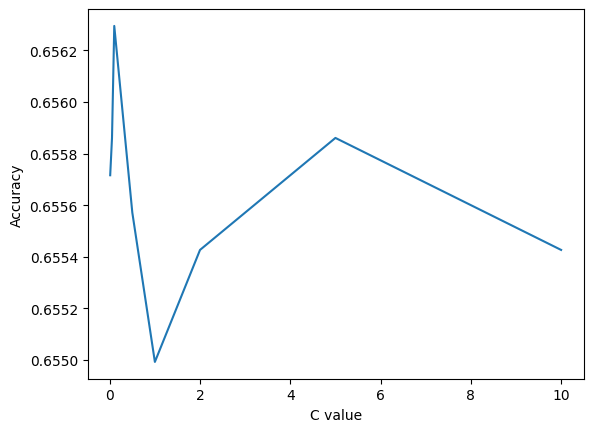

In [48]:
plt.plot(params2['C'], grid_search2.cv_results_['mean_test_score'])

plt.xlabel('C value')
plt.ylabel('Accuracy')

In [49]:
new_lr = grid_search2.best_estimator_
y_pred_new2 = new_lr.predict(X_train)

accuracy2 = accuracy_score(y_train, y_pred_new2)
print(accuracy2)

0.6594790159189581


In [50]:
coefs = new_lr.coef_[0]

coef_values = list(zip(X_train.columns, coefs))
sorted_coefs = sorted(coef_values, key=lambda x: abs(x[1]), reverse=True)


for vars, coefs in sorted_coefs:
    print(str(vars) + ", " + str(round(coefs,4)))

Individual Armed with - Cutting Instrument, 0.775
Individual Resistance -Active Resistance, -0.7327
Individual Resistance - Aggravated Active Aggression, 0.5566
Individual Armed With -Gun, 0.553
Individual Armed With - Other, 0.5497
Individual Resistance -Active Aggression, 0.5197
Individual Armed With - No Weapon, -0.4955
Individual Gender_Female, -0.3602
Individual Resistance -Passive Resistance, -0.3444
Individual Armed With - Blunt Instrument, 0.3373
Individual Gender_Male, 0.306
P-Hispanic Pop Rate, 0.254
P-Violent Arrests per 100k, -0.2244
P-Poverty Rate, 0.2151
Year_2019, -0.195
Year_2020, -0.1916
Police Employee Race / Ethnicity Grouping_Other, 0.1782
P-Black Pop Rate, -0.1622
Year_2022, 0.1478
Individual Resistance -Verbal Non Compliance, -0.145
Police Employee Race / Ethnicity Grouping_Hispanic, -0.138
Individual Resistance -Psychological Intimidation, 0.1367
Day of Week_4-WEDNESDAY, -0.135
Individual Race / Ethnicity Grouping_Hispanic, 0.1304
Year_2021, 0.1238
Day of Week_3-

In [51]:
force_prob_lr = new_lr.predict_proba(X_train)
force_prob_lr[:20]

array([[0.40345293, 0.59654707],
       [0.33850601, 0.66149399],
       [0.32777492, 0.67222508],
       [0.27874656, 0.72125344],
       [0.43986659, 0.56013341],
       [0.32250785, 0.67749215],
       [0.357898  , 0.642102  ],
       [0.56092252, 0.43907748],
       [0.25945737, 0.74054263],
       [0.26328438, 0.73671562],
       [0.59784016, 0.40215984],
       [0.31782561, 0.68217439],
       [0.60877408, 0.39122592],
       [0.78118431, 0.21881569],
       [0.23624236, 0.76375764],
       [0.38682486, 0.61317514],
       [0.31835143, 0.68164857],
       [0.85029907, 0.14970093],
       [0.46874889, 0.53125111],
       [0.68311451, 0.31688549]])

In [52]:
y_pred_last = new_lr.predict(X_test)
accuracy_last = accuracy_score(y_test, y_pred_last)

print(accuracy_last)

0.6597222222222222


In [53]:
cm1 = confusion_matrix(y_test, y_pred_last)
print(cm1)

[[335 373]
 [215 805]]


In [54]:
TP = cm1[1, 1]
FP = cm1[0, 1]
TN = cm1[0, 0]
FN = cm1[1, 0]

FPR = FP / (FP + TN)
TPR = TP / (TP + FN)
Precision = TP / (TP + FP)
Recall = TPR

In [55]:
from sklearn.metrics import roc_curve

test_prob_lr = new_lr.predict_proba(X_test)
FPR, TPR, thresholds = roc_curve(y_test, test_prob_lr[:,1])

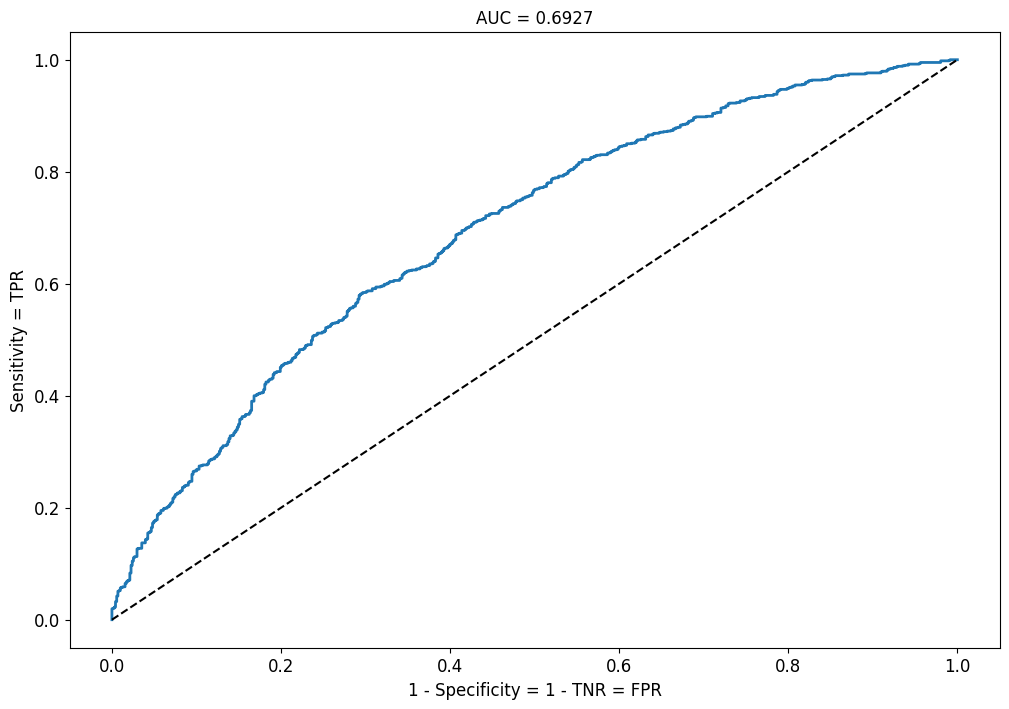

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.step(FPR, TPR, linewidth=2)
ax.plot([0,1], [0,1], '--', color = 'black')

fs = 12
ax.set_xlabel('1 - Specificity = 1 - TNR = FPR', fontsize=fs)
ax.set_ylabel('Sensitivity = TPR', fontsize=fs)
ax.tick_params(axis='both', labelsize=fs)

AUC = np.trapz(TPR, FPR)
ax.set_title('AUC = ' + str(round(AUC,4)))
plt.savefig('component_severe.png')

In [119]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(first, more_reduced[['Very Severe Force Used']], test_size=.2, random_state=55)

In [120]:
cont_vars = X_train2[["Hour", "B-Poverty Rate", "B-Black Pop Rate", "B-Hispanic Pop Rate", "B-Violent Arrests per 100k", "P-Poverty Rate",
                    "P-Black Pop Rate", "P-Hispanic Pop Rate", "P-Violent Arrests per 100k", "Individual Age"]]

In [121]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_subset = cont_vars
X_train_scaled = std_scaler.fit_transform(X_train_subset)

X_train_subset_std_scaled = std_scaler.fit_transform(X_train_subset)

X_train2[["Hour", "B-Poverty Rate", "B-Black Pop Rate", "B-Hispanic Pop Rate", "B-Violent Arrests per 100k", "P-Poverty Rate",
                    "P-Black Pop Rate", "P-Hispanic Pop Rate", "P-Violent Arrests per 100k", "Individual Age"]] = pd.DataFrame(X_train_subset_std_scaled, columns = X_train_subset.columns,index = X_train_subset.index)

In [122]:
X_test_subset = X_test2[["Hour", "B-Poverty Rate", "B-Black Pop Rate", "B-Hispanic Pop Rate", "B-Violent Arrests per 100k", "P-Poverty Rate",
                    "P-Black Pop Rate", "P-Hispanic Pop Rate", "P-Violent Arrests per 100k", "Individual Age"]]

X_test_subset_std_scaled = std_scaler.transform(X_test_subset)

X_test2[["Hour", "B-Poverty Rate", "B-Black Pop Rate", "B-Hispanic Pop Rate", "B-Violent Arrests per 100k", "P-Poverty Rate",
                    "P-Black Pop Rate", "P-Hispanic Pop Rate", "P-Violent Arrests per 100k", "Individual Age"]] = pd.DataFrame(X_test_subset_std_scaled, columns = X_test_subset.columns, index = X_test_subset.index)

In [123]:
y_train2 = np.ravel(y_train2)
y_test2 = np.ravel(y_test2)

In [124]:
lr_severe_first = LogisticRegression(random_state=55, penalty='l2', max_iter=1000)
lr_severe_first.fit(X_train2, y_train2)
y_pred_severe = lr_severe_first.predict(X_train2)

In [125]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train2, y_pred_severe)

0.7520984081041968

In [126]:
from sklearn.metrics import confusion_matrix

# [TN, FP]
# [FN, TP]

cm = confusion_matrix(y_train2, y_pred_severe)
print(cm)

[[4816  271]
 [1442  381]]


In [127]:
severe_cval = cross_val_score(lr_severe_first, X_train2, y_train2, scoring="accuracy", cv=10)
print(severe_cval)
print(severe_cval.mean())

[0.7568741  0.73950796 0.74819103 0.74384949 0.75108538 0.73950796
 0.75397974 0.75108538 0.74963821 0.7568741 ]
0.7490593342981187


In [128]:
lr_severe_first2 = LogisticRegression(random_state=55, penalty='l2', max_iter=1000)

grid_severe2 = GridSearchCV(lr_severe_first2, params2, cv=10)
grid_severe2.fit(X_train2, y_train2)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, random_state=55),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]})

In [129]:
print(grid_severe2.best_params_)

{'C': 5}


Text(0, 0.5, 'Accuracy')

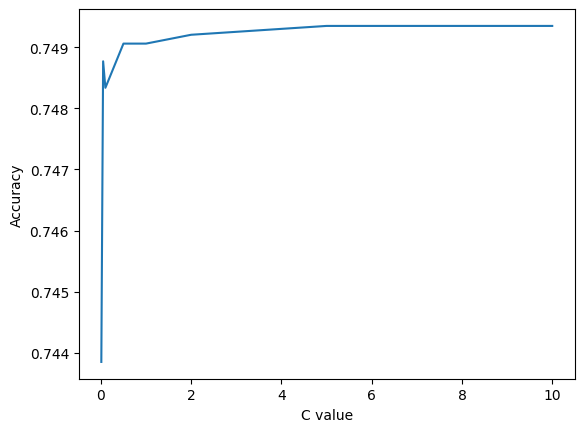

In [130]:
plt.plot(params2['C'], grid_severe2.cv_results_['mean_test_score'])

plt.xlabel('C value')
plt.ylabel('Accuracy')

In [131]:
new_lr2 = grid_severe2.best_estimator_
y_pred_new3 = new_lr2.predict(X_train2)

accuracy3 = accuracy_score(y_train2, y_pred_new3)
print(accuracy3)

0.7526772793053546


In [132]:
cm = confusion_matrix(y_train2, y_pred_new3)
print(cm)

[[4811  276]
 [1433  390]]


In [133]:
coefs = new_lr2.coef_[0]

coef_values = list(zip(X_train.columns, coefs))
sorted_coefs = sorted(coef_values, key=lambda x: abs(x[1]), reverse=True)


for vars, coefs in sorted_coefs:
    print(str(vars) + ", " + str(round(coefs,4)))

Day of Week_4-WEDNESDAY, 1.8669
Individual Race / Ethnicity Grouping_Hispanic, 1.4983
Day of Week_2-MONDAY, -1.1876
Individual Resistance -Active Aggression, 1.1314
Individual Resistance - Aggravated Active Aggression, 0.9415
Individual Armed With -Gun, 0.79
Individual Armed with - Cutting Instrument, -0.7778
Day of Week_3-TUESDAY, -0.7017
Police Employee Race / Ethnicity Grouping_White, -0.698
Individual Armed With - Blunt Instrument, -0.6335
Police Employee Race / Ethnicity Grouping_Hispanic, -0.5928
Police Employee Race / Ethnicity Grouping_Other, -0.5441
B-Poverty Rate, -0.4611
is South Mountain Precinct, 0.4572
Individual Armed With - No Weapon, -0.444
Individual Race / Ethnicity Grouping_Other, 0.2791
Individual Resistance -Passive Resistance, -0.2723
is Central City Precinct, -0.2437
Individual Resistance -Verbal Non Compliance, -0.2074
is Black Mountain Precinct, 0.1938
Police Employee Gender / Sex_Male, 0.1858
Individual Resistance -Psychological Intimidation, -0.184
is Cactus

In [134]:
force_prob_lr2 = new_lr2.predict_proba(X_train2)
force_prob_lr2[:20]

array([[0.62845786, 0.37154214],
       [0.91858391, 0.08141609],
       [0.69061345, 0.30938655],
       [0.64487542, 0.35512458],
       [0.87932262, 0.12067738],
       [0.95548662, 0.04451338],
       [0.70800773, 0.29199227],
       [0.94467351, 0.05532649],
       [0.7369553 , 0.2630447 ],
       [0.56496223, 0.43503777],
       [0.92280579, 0.07719421],
       [0.65307549, 0.34692451],
       [0.7908079 , 0.2091921 ],
       [0.8581429 , 0.1418571 ],
       [0.57146436, 0.42853564],
       [0.78005673, 0.21994327],
       [0.47262505, 0.52737495],
       [0.90821577, 0.09178423],
       [0.74714642, 0.25285358],
       [0.82050182, 0.17949818]])

In [135]:
y_pred_last2 = new_lr2.predict(X_test2)
accuracy_last2 = accuracy_score(y_test2, y_pred_last2)

print(accuracy_last2)

0.7465277777777778


In [136]:
cm2 = confusion_matrix(y_test2, y_pred_last2)
print(cm2)

[[1194   72]
 [ 366   96]]


In [137]:
TP = cm2[1, 1]
FP = cm2[0, 1]
TN = cm2[0, 0]
FN = cm2[1, 0]

FPR = FP / (FP + TN)
TPR = TP / (TP + FN)
Precision = TP / (TP + FP)
Recall = TPR

In [138]:
from sklearn.metrics import roc_curve

test_prob_lr = new_lr2.predict_proba(X_test2)
FPR, TPR, thresholds = roc_curve(y_test2, test_prob_lr[:,1])

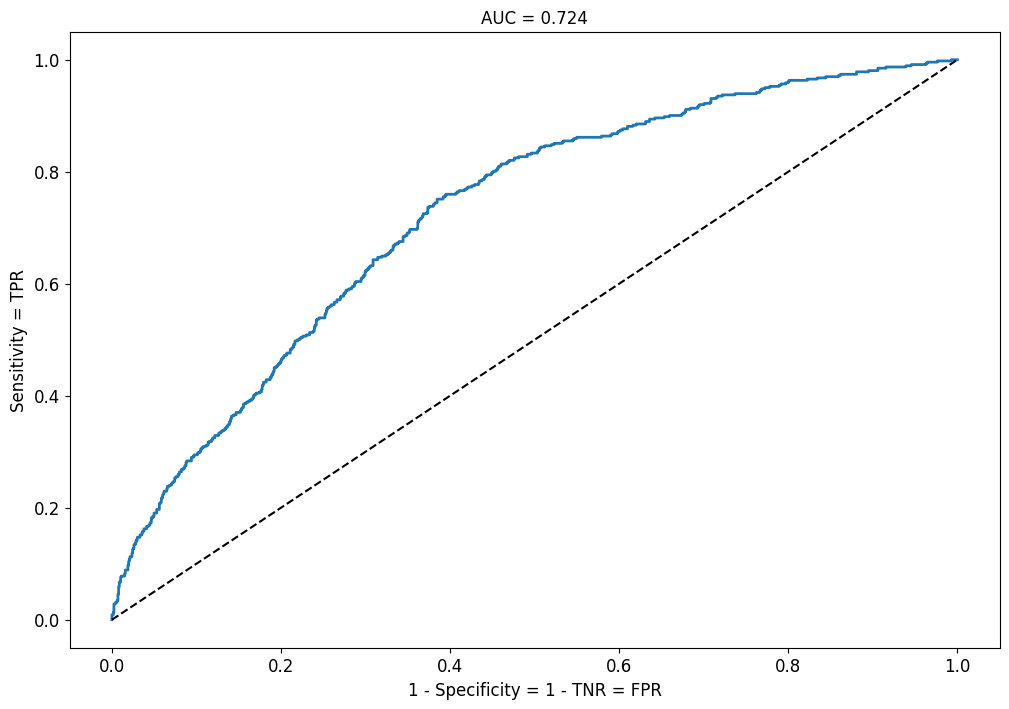

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.step(FPR, TPR, linewidth=2)
ax.plot([0,1], [0,1], '--', color = 'black')

fs = 12
ax.set_xlabel('1 - Specificity = 1 - TNR = FPR', fontsize=fs)
ax.set_ylabel('Sensitivity = TPR', fontsize=fs)
ax.tick_params(axis='both', labelsize=fs)

AUC = np.trapz(TPR, FPR)
ax.set_title('AUC = ' + str(round(AUC,4)))
plt.savefig('component_very_severe.png')

In [78]:
# Run models again - this time with specific locations rather than the location components
# I am trying to test whether the specific interactions of each location, different cultures, etc. are better at predicting than intuitive components

In [81]:
X_train, X_test, y_train, y_test = train_test_split(second, more_reduced[['Severe Force Used']], test_size=.2, random_state=55)

In [82]:
cont_vars = X_train[["Hour", "B-Poverty Rate", "B-Black Pop Rate", "B-Hispanic Pop Rate", "B-Violent Arrests per 100k", "P-Poverty Rate",
                    "P-Black Pop Rate", "P-Hispanic Pop Rate", "P-Violent Arrests per 100k", "Individual Age"]]

In [83]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_subset = cont_vars
X_train_scaled = std_scaler.fit_transform(X_train_subset)

X_train_subset_std_scaled = std_scaler.fit_transform(X_train_subset)

X_train[["Hour", "B-Poverty Rate", "B-Black Pop Rate", "B-Hispanic Pop Rate", "B-Violent Arrests per 100k", "P-Poverty Rate",
                    "P-Black Pop Rate", "P-Hispanic Pop Rate", "P-Violent Arrests per 100k", "Individual Age"]] = pd.DataFrame(X_train_subset_std_scaled, columns = X_train_subset.columns,index = X_train_subset.index)


In [84]:
X_test_subset = X_test[["Hour", "B-Poverty Rate", "B-Black Pop Rate", "B-Hispanic Pop Rate", "B-Violent Arrests per 100k", "P-Poverty Rate",
                    "P-Black Pop Rate", "P-Hispanic Pop Rate", "P-Violent Arrests per 100k", "Individual Age"]]

X_test_subset_std_scaled = std_scaler.transform(X_test_subset)

X_test[["Hour", "B-Poverty Rate", "B-Black Pop Rate", "B-Hispanic Pop Rate", "B-Violent Arrests per 100k", "P-Poverty Rate",
                    "P-Black Pop Rate", "P-Hispanic Pop Rate", "P-Violent Arrests per 100k", "Individual Age"]] = pd.DataFrame(X_test_subset_std_scaled, columns = X_test_subset.columns, index = X_test_subset.index)

In [85]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [86]:
lr_first = LogisticRegression(random_state=55, penalty='l2', max_iter=1000)
lr_first.fit(X_train, y_train)
y_pred_lr = lr_first.predict(X_train)

In [87]:
accuracy_score(y_train, y_pred_lr)

0.6790159189580318

In [88]:
logit_cval = cross_val_score(lr_first, X_train, y_train, scoring="accuracy", cv=10)
print(logit_cval)
print(logit_cval.mean())

[0.62373372 0.6382055  0.66570188 0.6845152  0.64978292 0.68017366
 0.6512301  0.68162084 0.66714906 0.68017366]
0.6622286541244573


In [89]:
params2 = {'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]}

lr_first2 = LogisticRegression(random_state=55, penalty='l2', max_iter=1000)

grid_search2 = GridSearchCV(lr_first2, params2, cv=10)
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, random_state=55),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]})

In [90]:
print(grid_search2.best_params_)

{'C': 0.1}


Text(0, 0.5, 'Accuracy')

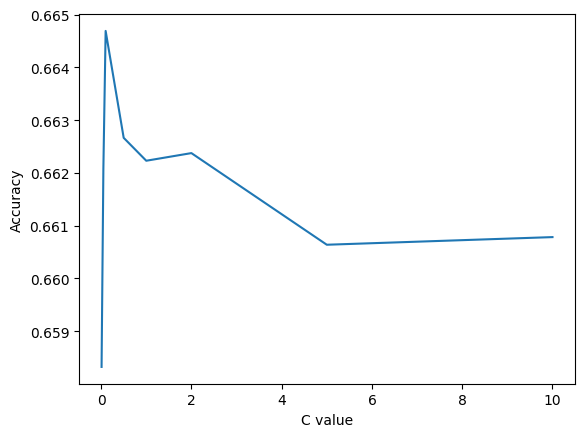

In [91]:
plt.plot(params2['C'], grid_search2.cv_results_['mean_test_score'])

plt.xlabel('C value')
plt.ylabel('Accuracy')

In [92]:
new_lr = grid_search2.best_estimator_
y_pred_new2 = new_lr.predict(X_train)

accuracy2 = accuracy_score(y_train, y_pred_new2)
print(accuracy2)

0.6746743849493487


In [93]:
coefs = new_lr.coef_[0]

coef_values = list(zip(X_train.columns, coefs))
sorted_coefs = sorted(coef_values, key=lambda x: abs(x[1]), reverse=True)


for vars, coefs in sorted_coefs:
    print(str(vars) + ", " + str(round(coefs,4)))

Individual Armed with - Cutting Instrument, 0.7754
Individual Resistance -Active Resistance, -0.752
Individual Armed With - Other, 0.5606
Individual Resistance - Aggravated Active Aggression, 0.5548
Individual Resistance -Active Aggression, 0.5353
Individual Armed With -Gun, 0.529
Police Beat_421, -0.5254
Individual Armed With - No Weapon, -0.5122
Police Beat_424, 0.4365
Police Beat_211, 0.3943
Individual Gender_Female, -0.3681
Police Beat_824, 0.3559
Individual Resistance -Passive Resistance, -0.3436
Police Beat_591, -0.3421
Police Beat_726, -0.3353
Individual Armed With - Blunt Instrument, 0.3274
Police Beat_925, -0.3187
Individual Gender_Male, 0.3084
Police Beat_921, 0.3074
Police Beat_625, 0.3034
Police Beat_923, 0.3
Police Beat_615, 0.2962
Police Beat_712, -0.2827
Police Beat_412, -0.2787
Police Beat_622, -0.2781
Police Beat_825, 0.2769
Police Beat_733, 0.2716
Police Beat_724, -0.2703
Police Beat_711, 0.2669
Police Beat_924, -0.2567
Police Beat_232, -0.2484
Police Beat_411, -0.246

In [94]:
y_pred_last = new_lr.predict(X_test)
accuracy_last = accuracy_score(y_test, y_pred_last)

print(accuracy_last)

0.6585648148148148


In [95]:
cm1 = confusion_matrix(y_test, y_pred_last)
print(cm1)

[[343 365]
 [225 795]]


In [96]:
TP = cm1[1, 1]
FP = cm1[0, 1]
TN = cm1[0, 0]
FN = cm1[1, 0]

FPR = FP / (FP + TN)
TPR = TP / (TP + FN)
Precision = TP / (TP + FP)
Recall = TPR

In [97]:
test_prob_lr = new_lr.predict_proba(X_test)
FPR, TPR, thresholds = roc_curve(y_test, test_prob_lr[:,1])

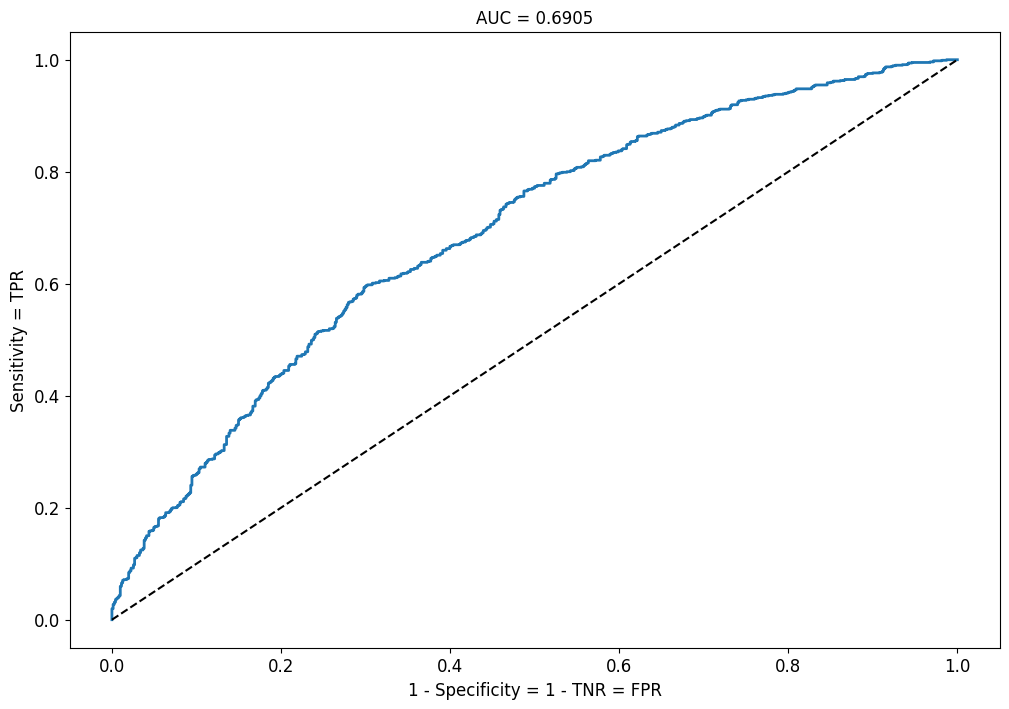

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.step(FPR, TPR, linewidth=2)
ax.plot([0,1], [0,1], '--', color = 'black')

fs = 12
ax.set_xlabel('1 - Specificity = 1 - TNR = FPR', fontsize=fs)
ax.set_ylabel('Sensitivity = TPR', fontsize=fs)
ax.tick_params(axis='both', labelsize=fs)

AUC = np.trapz(TPR, FPR)
ax.set_title('AUC = ' + str(round(AUC,4)))
plt.savefig('location_severe.png')

In [99]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(second, more_reduced[['Very Severe Force Used']], test_size=.2, random_state=55)

In [100]:
cont_vars = X_train2[["Hour", "B-Poverty Rate", "B-Black Pop Rate", "B-Hispanic Pop Rate", "B-Violent Arrests per 100k", "P-Poverty Rate",
                    "P-Black Pop Rate", "P-Hispanic Pop Rate", "P-Violent Arrests per 100k", "Individual Age"]]

In [101]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_subset = cont_vars
X_train_scaled = std_scaler.fit_transform(X_train_subset)

X_train_subset_std_scaled = std_scaler.fit_transform(X_train_subset)

X_train2[["Hour", "B-Poverty Rate", "B-Black Pop Rate", "B-Hispanic Pop Rate", "B-Violent Arrests per 100k", "P-Poverty Rate",
                    "P-Black Pop Rate", "P-Hispanic Pop Rate", "P-Violent Arrests per 100k", "Individual Age"]] = pd.DataFrame(X_train_subset_std_scaled, columns = X_train_subset.columns,index = X_train_subset.index)

In [102]:
X_test_subset = X_test2[["Hour", "B-Poverty Rate", "B-Black Pop Rate", "B-Hispanic Pop Rate", "B-Violent Arrests per 100k", "P-Poverty Rate",
                    "P-Black Pop Rate", "P-Hispanic Pop Rate", "P-Violent Arrests per 100k", "Individual Age"]]

X_test_subset_std_scaled = std_scaler.transform(X_test_subset)

X_test2[["Hour", "B-Poverty Rate", "B-Black Pop Rate", "B-Hispanic Pop Rate", "B-Violent Arrests per 100k", "P-Poverty Rate",
                    "P-Black Pop Rate", "P-Hispanic Pop Rate", "P-Violent Arrests per 100k", "Individual Age"]] = pd.DataFrame(X_test_subset_std_scaled, columns = X_test_subset.columns, index = X_test_subset.index)

In [103]:
y_train2 = np.ravel(y_train2)
y_test2 = np.ravel(y_test2)

In [104]:
lr_severe_first = LogisticRegression(random_state=55, penalty='l2', max_iter=1000)
lr_severe_first.fit(X_train2, y_train2)
y_pred_severe = lr_severe_first.predict(X_train2)

In [105]:
accuracy_score(y_train2, y_pred_severe)

0.7599131693198263

In [106]:
severe_cval = cross_val_score(lr_severe_first, X_train2, y_train2, scoring="accuracy", cv=10)
print(severe_cval)
print(severe_cval.mean())

[0.75253256 0.73516643 0.75397974 0.74963821 0.75253256 0.75253256
 0.75397974 0.74819103 0.75397974 0.75832127]
0.7510853835021708


In [107]:
lr_severe_first2 = LogisticRegression(random_state=55, penalty='l2', max_iter=1000)

grid_severe2 = GridSearchCV(lr_severe_first2, params2, cv=10)
grid_severe2.fit(X_train2, y_train2)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, random_state=55),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]})

In [108]:
print(grid_severe2.best_params_)

{'C': 0.1}


Text(0, 0.5, 'Accuracy')

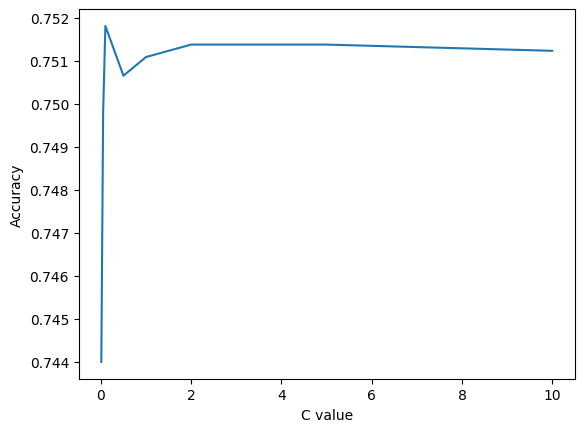

In [109]:
plt.plot(params2['C'], grid_severe2.cv_results_['mean_test_score'])

plt.xlabel('C value')
plt.ylabel('Accuracy')

In [110]:
new_lr2 = grid_severe2.best_estimator_
y_pred_new3 = new_lr2.predict(X_train2)

accuracy3 = accuracy_score(y_train2, y_pred_new3)
print(accuracy3)

0.7571635311143271


In [111]:
cm = confusion_matrix(y_train2, y_pred_new3)
print(cm)

[[4824  263]
 [1415  408]]


In [112]:
coefs = new_lr2.coef_[0]

coef_values = list(zip(X_train.columns, coefs))
sorted_coefs = sorted(coef_values, key=lambda x: abs(x[1]), reverse=True)


for vars, coefs in sorted_coefs:
    print(str(vars) + ", " + str(round(coefs,4)))

Individual Resistance -Active Aggression, 1.0943
Individual Resistance - Aggravated Active Aggression, 0.8613
Individual Armed With -Gun, 0.7345
Individual Armed with - Cutting Instrument, -0.5533
Police Beat_411, -0.4413
Year_2018, 0.4397
Individual Armed With - Blunt Instrument, -0.4128
Police Beat_591, -0.4113
Police Beat_625, 0.4021
Police Beat_726, -0.381
Year_2023, -0.3751
Police Beat_434, -0.3639
Police Beat_424, 0.3518
Police Beat_634, -0.3378
Police Beat_514, 0.3332
Police Beat_832, -0.3144
Police Beat_714, 0.3134
Police Beat_834, -0.3124
Police Beat_632, 0.2996
Police Beat_213, -0.2968
Individual Armed With - No Weapon, -0.2956
Police Beat_711, 0.2854
Police Beat_814, 0.2848
Individual Gender_Female, -0.2833
Individual Resistance -Passive Resistance, -0.281
Police Beat_623, 0.2786
Police Beat_823, 0.2756
Police Beat_931, -0.2737
Year_2021, -0.273
Police Beat_925, -0.2725
Police Beat_732, -0.2688
Police Beat_731, 0.2653
Police Beat_923, 0.2491
is Cactus Park Precinct, 0.241
Po

In [113]:
y_pred_last2 = new_lr2.predict(X_test2)
accuracy_last2 = accuracy_score(y_test2, y_pred_last2)

print(accuracy_last2)

0.7390046296296297


In [114]:
cm2 = confusion_matrix(y_test2, y_pred_last2)
print(cm2)

[[1190   76]
 [ 375   87]]


In [115]:
TP = cm2[1, 1]
FP = cm2[0, 1]
TN = cm2[0, 0]
FN = cm2[1, 0]

FPR = FP / (FP + TN)
TPR = TP / (TP + FN)
Precision = TP / (TP + FP)
Recall = TPR

In [116]:
test_prob_lr = new_lr2.predict_proba(X_test2)
FPR, TPR, thresholds = roc_curve(y_test2, test_prob_lr[:,1])

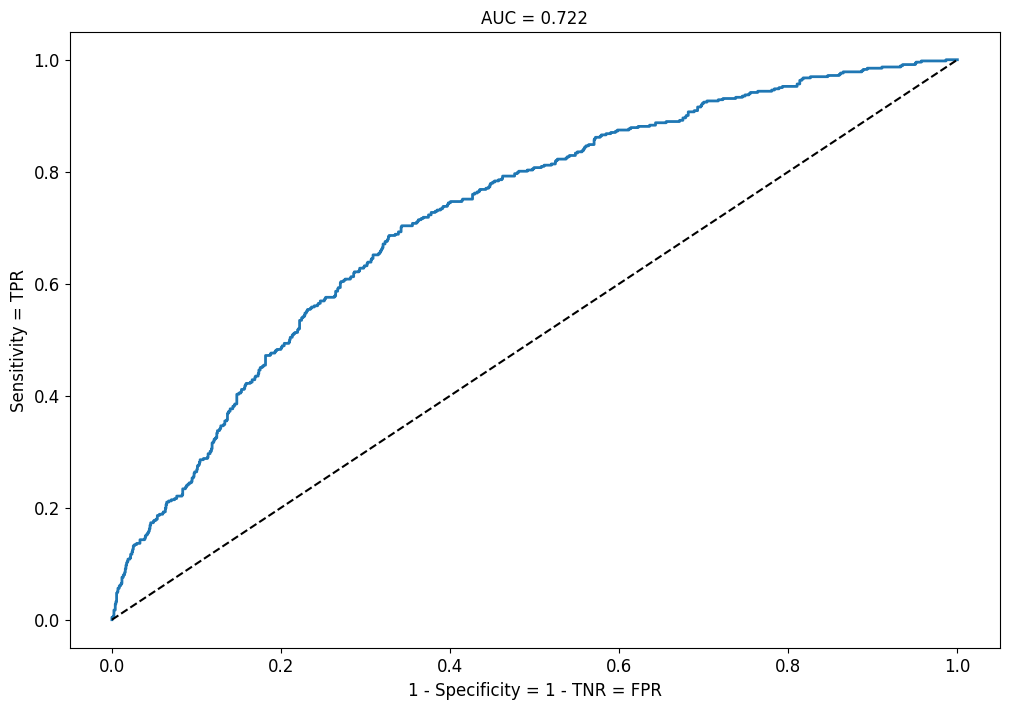

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.step(FPR, TPR, linewidth=2)
ax.plot([0,1], [0,1], '--', color = 'black')

fs = 12
ax.set_xlabel('1 - Specificity = 1 - TNR = FPR', fontsize=fs)
ax.set_ylabel('Sensitivity = TPR', fontsize=fs)
ax.tick_params(axis='both', labelsize=fs)

AUC = np.trapz(TPR, FPR)
ax.set_title('AUC = ' + str(round(AUC,4)))
plt.savefig('location_very_severe.png')